In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw as W
from scipy import optimize
%matplotlib inline

 - https://en.wikipedia.org/wiki/Lambert_W_function
 - https://en.wikipedia.org/wiki/Johann_Heinrich_Lambert
 - https://math.stackexchange.com/questions/3020913/how-many-solutions-are-there-for-the-equation-ax-log-a-x-where-0-a-1
 - https://www.wolframalpha.com/input/?i=plot((x*log(x)%2Flambertw(x*log(x)))%5E(1%2Fx),x%3D0..1)
 - https://www.wolframalpha.com/input/?i=plot(exp(lambertw(x*log(x))%2Fx),x%3D0..1)
 - https://www.wolframalpha.com/input/?i=(x*log(x)%2Flambertw(x*log(x)))%5E(1%2Fx)+%3D%3D+exp(lambertw(x*log(x))%2Fx)

In [2]:
h = np.exp(-np.exp(1))
z = np.exp(-1)

In [3]:
x = np.linspace(0.001, 1.000, 1001)
a = 0.5
(x*np.log(x))[-5:]

array([-0.00398801, -0.0029925 , -0.001996  , -0.0009985 ,  0.        ])

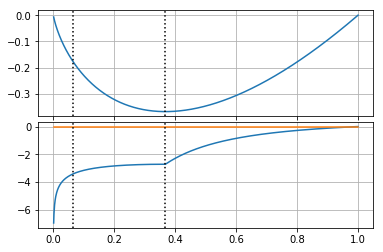

In [4]:
fig, axe = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05})
axe[0].plot(x, x*np.log(x))
axe[1].plot(x, W(x*np.log(x)).real/x)
axe[1].plot(x, W(x*np.log(x)).imag/x)
for i in range(2):
    axe[i].grid()
    axe[i].axvline(h, linestyle=':', color='k')
    axe[i].axvline(z, linestyle=':', color='k')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


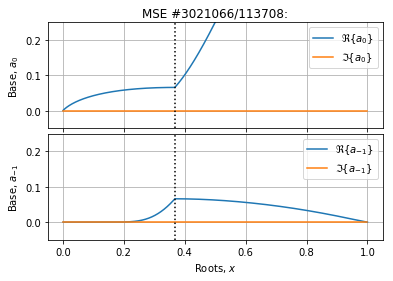

In [5]:
fig, axe = plt.subplots(2, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0.05})
x = np.linspace(0.001, 1.000, 1001)
axe[0].plot(x, np.exp(W(x*np.log(x))/x).real, label=r"$\Re\{a_0\}$")
axe[0].plot(x, np.exp(W(x*np.log(x))/x).imag, label=r"$\Im\{a_0\}$")
axe[1].plot(x, np.exp(W(x*np.log(x), k=-1)/x).real, label=r"$\Re\{a_{-1}\}$")
axe[1].plot(x, np.exp(W(x*np.log(x), k=-1)/x).imag, label=r"$\Im\{a_{-1}\}$")
#axe.set_xlim([0,0.4])
axe[0].set_title(r"MSE #3021066/113708:")
axe[1].set_xlabel(r"Roots, $x$")
axe[0].set_ylim([-0.05,0.25])
for i in range(2):
    axe[i].legend()#bbox_to_anchor=(1,1), loc='upper left')
    axe[i].axvline(np.exp(-1), linestyle=':', color='k')
    axe[i].set_ylabel(r"Base, $a_{%d}$" % -i)
    axe[i].grid()
fig.savefig("base.png", dpi=120)

fig, axe = plt.subplots()
x = np.linspace(0.001, 1.000, 1001)
#axe.plot(x, np.exp(W(x*np.log(x)).real/x))
#axe.plot(x, np.exp(W(x*np.log(x)).imag/x))
axe.semilogy(x, np.power(x*np.log(x)/np.exp(W(x*np.log(x))),1/x).real)
axe.plot(x, np.power(x*np.log(x)/np.exp(W(x*np.log(x))),1/x).imag)
axe.set_xlim([0,0.4])
axe.grid()

In [6]:
np.power(x*np.log(x)/np.exp(W(x*np.log(x))),1/x)

array([ 0.        -0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        -0.00000000e+00j, ..., -0.00197523-1.24233136e-05j,
       -0.00099261-3.11839423e-06j,  0.        +0.00000000e+00j])

In [7]:
def plot(a):
    fig, axe = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [5, 3], 'hspace': 0.05})
    x = np.linspace(0, 2, 101)[1:]
    axe[0].plot(x, a**x, label=r"$a^x$")
    axe[0].plot(x, np.log(x)/np.log(a), label=r"$\log_a(x)$")
    axe[1].plot(x, a**x - np.log(x)/np.log(a), label=r"$f(x)$")
    axe[1].plot(x, np.log(a)*a**x - 1/(x*np.log(a)), label=r"$f'(x)$")
    axe[0].set_ylim([-0.5,1.5])
    axe[1].set_ylim([-0.15,0.15])
    axe[0].set_title(r"MSE #3021066/113708: $a=%.3f$" % a)
    for i in range(2):
        axe[i].legend()#bbox_to_anchor=(1,1), loc='upper left')
        axe[i].grid()
    return fig, axe

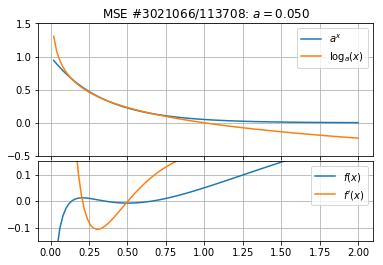

In [8]:
p = plot(a=0.05)
p[0].savefig("3roots.png", dpi=120)

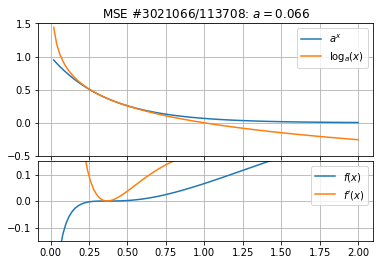

In [9]:
p = plot(a=np.exp(-np.exp(1)))
p[0].savefig("tripleroot.png", dpi=120)

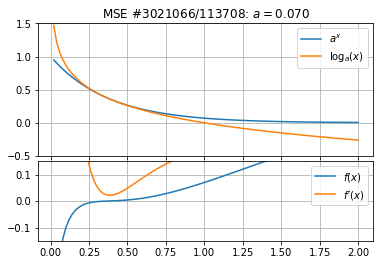

In [10]:
p = plot(a=0.07)
p[0].savefig("1root.png", dpi=120)

 - https://www.wolframalpha.com/input/?i=diff(a%5Ex,+x)
 - https://www.wolframalpha.com/input/?i=diff(a%5Ex,+a)
 - https://www.wolframalpha.com/input/?i=diff(log(a,x),+x)
 - https://www.wolframalpha.com/input/?i=diff(log(a,x),+a)
 - https://www.wolframalpha.com/input/?i=D%5Blog(a,x),+%7Bx,2%7D%5D
 - https://www.wolframalpha.com/input/?i=D%5Ba%5Ex+-+log(a,x),+x%5D
 - https://www.wolframalpha.com/input/?i=plot(lambertw(x*log(x))%2Fx,+x%3D0..1)
 - https://www.wolframalpha.com/input/?i=D%5Blambertw(x*log(x))%2Fx,x%5D
 - https://www.wolframalpha.com/input/?i=D%5Blambertw(x*log(x))%2Fx,x,x%5D

$$
a^x = \log_a(x) \,,\quad a \in (0,1) \,,\quad x \in \mathbb{R}^+_0
$$

$$
f_1(x,a) = a^x \,,\quad f_2(x,a) = \log_a(x)
$$

$$
f(x,a) = f_1(x,a) - f_2(x,a) = a^x - \log_a(x)
$$

In [11]:
def solve(a):
    
    def f(x, a=a):
        return a**x - np.log(x)/np.log(a)
    def j(x, a=a):
        return np.log(a)*a**x - 1/(x*np.log(a))
    
    eps = 100*np.finfo(float).eps
    if a < np.exp(-np.exp(1)):
        x0 = (W(1/np.log(a))/np.log(a)).real
        x1 = (W(1/np.log(a), k=-1)/np.log(a)).real
        x_ = np.array([eps, (x0+x1)/2, 1.-eps])
    else:
        x_ = np.array([0.5, 0.5, 0.5])
    
    for i, x0 in enumerate(x_):
        x_[i] = optimize.root(f, x0, jac=j, method='hybr').x
    
    return x_
    #

In [12]:
n = 1001
a = np.arange(1e-14, 0.999, 0.001)
x = np.full((a.shape[0], 3), np.nan)
for i, z in enumerate(a):
    x[i,:] = solve(z)

In [13]:
x

array([[1.00000000e-14, 7.88140323e-02, 1.00000000e+00],
       [1.05125106e-03, 2.19513152e-01, 9.92764518e-01],
       [2.17394446e-03, 2.33829915e-01, 9.86580640e-01],
       ...,
       [9.96015905e-01, 9.96015905e-01, 9.96015905e-01],
       [9.97008960e-01, 9.97008960e-01, 9.97008960e-01],
       [9.98003988e-01, 9.98003988e-01, 9.98003988e-01]])

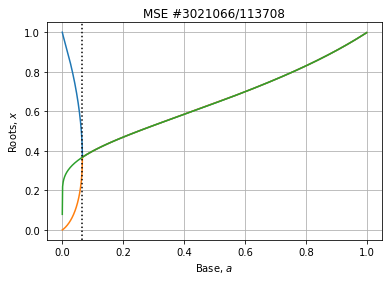

In [14]:
fig, axe = plt.subplots()
axe.plot(a, x[:,[2,0,1]])
axe.axvline(np.exp(-np.exp(1)), linestyle=':', color='k')
axe.set_title(r"MSE #3021066/113708")
axe.set_xlabel(r"Base, $a$")
axe.set_ylabel(r"Roots, $x$")
#axe.legend([r"w", r"w", r"w"])
axe.grid()
#axe.set_ylim([0,1])
fig.savefig("roots.png", dpi=120)

In [15]:
a[:10]
x[:10]

array([[1.00000000e-14, 7.88140323e-02, 1.00000000e+00],
       [1.05125106e-03, 2.19513152e-01, 9.92764518e-01],
       [2.17394446e-03, 2.33829915e-01, 9.86580640e-01],
       [3.35606698e-03, 2.43309632e-01, 9.80692943e-01],
       [4.59313292e-03, 2.50623038e-01, 9.74958080e-01],
       [5.88280619e-03, 2.56674889e-01, 9.69311771e-01],
       [7.22378882e-03, 2.61890287e-01, 9.63717696e-01],
       [8.61539393e-03, 2.66505658e-01, 9.58152574e-01],
       [1.00573398e-02, 2.70667094e-01, 9.52600189e-01],
       [1.15496370e-02, 2.74471670e-01, 9.47048550e-01]])